# Modelo de HP para decomponer tendencia y ciclo
Este proyecto lo hago con el objetivo de entender como se comporta la tasa de cambio para poder crear estrategias de cobertura para exportadores

In [1]:
!pip install statsmodels
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [2]:
import matplotlib.pyplot as plt

### Datos de la TRM para colombia
voy a definir el plazo de tiempo en un mes con el objetivo de ver relaciones a más largo plazo por la caracteristica de las operaciones que van a hacer los clientes

In [39]:
trm=pd.read_excel("TRM_historico.xlsx",index_col=0)

In [40]:
trm_m=trm#.resample("m").last()
trm_m.head()

,TRM
Fecha,
2000-01-01,1873.77
2000-01-02,1873.77
2000-01-03,1873.77
2000-01-04,1874.35
2000-01-05,1895.97


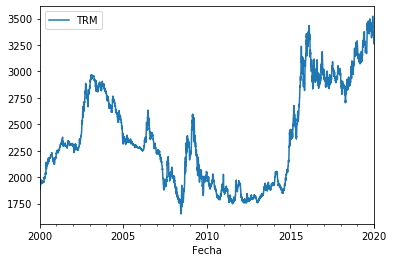

In [41]:
trm_m.plot()

### Filtro de HP

In [181]:
#### Codigo para el HP
cycle, trend=sm.tsa.filters.hpfilter(trm_m, 100*(365)**2)
cycle_1=pd.DataFrame(cycle)
trend_1=pd.DataFrame(trend)

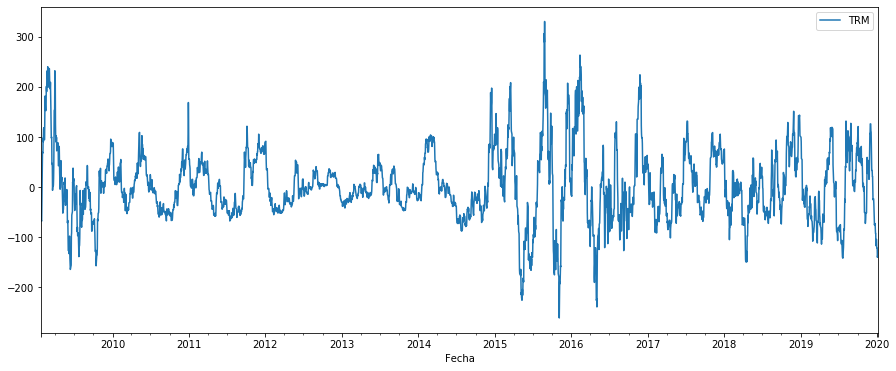

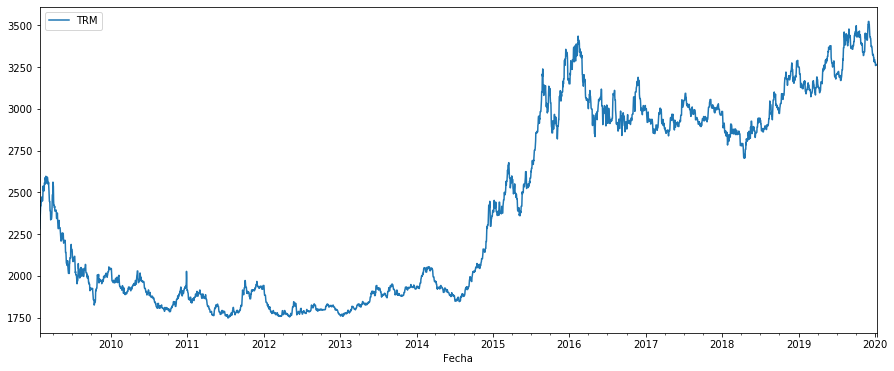

In [182]:
cycle_1[-4000:].plot(figsize=(15,6))
trm[-4000:].plot(figsize=(15,6))
plt.show()

# Oscilador a partir del ciclo de HP

In [172]:
def cot_oscillator(df_1,D):
    cycle, trend=sm.tsa.filters.hpfilter(df_1, 100*(365)**2)
    df=pd.DataFrame(cycle)
    trend_1=pd.DataFrame(trend)
    oscilador=100-100*(df.rolling(window=D).max()-df)/(df.rolling(window=D).max()-df.rolling(window=D).min())
    return pd.DataFrame(oscilador)

In [188]:
cot_oscillator(trm_m,365)[-1:]

,TRM
Fecha,
2020-01-08,2.523081


In [190]:
prueba=1400
posicion=pd.DataFrame()
for i in range(0,prueba+1):
    base=(trm_m[i:len(trm_m)-prueba+i])
    posicion=posicion.append(cot_oscillator(base,365)[-1:],sort=True)
    
posicion=posicion.shift(1)

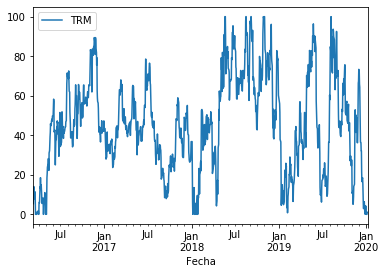

In [191]:
posicion.plot()

# Retornos
voy a hacer un backtest de la strategia por ahora sería in sample, más adelante la voy a dejar out of sample

In [192]:
trm_r=(np.log(trm_m)-np.log(trm_m.shift(1)))*100

In [193]:
estrategia=trm_r

In [194]:
estrategia["posicion"]=posicion

In [195]:
retorno=estrategia[estrategia.columns[0]]*estrategia[estrategia.columns[1]]

[]

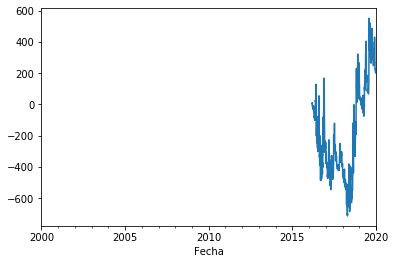

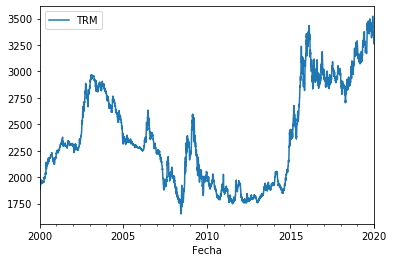

In [196]:
retorno.cumsum().plot()
trm_m.plot()
plt.plot()

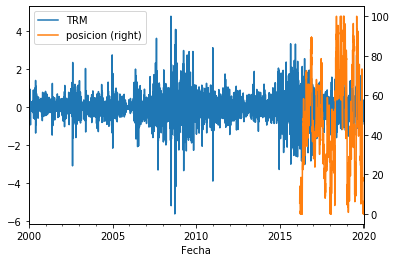

In [197]:
estrategia.plot(secondary_y="posicion")